<a href="https://colab.research.google.com/github/AnkanaSonowal/Final-Year-Research-Project-Social-Network-Analysis/blob/main/ModelCompareOpinionDiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN 
import math

#CODE IF UPLOADED FILE FROM GOOGLE DRIVE

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
 id = '118-9VDRYtms5g-eWw1SX4R6wBw4FVVEf'
print (id) # Verify that you have everything after '='

118-9VDRYtms5g-eWw1SX4R6wBw4FVVEf


#UPLOAD DATASET ALL PARAMETERS IN finalValuesUpdated.csv

In [ ]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('finalValuesUpdated.csv')  
my_data = pd.read_csv('finalValuesUpdated.csv',index_col=0)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# csv5 = 'finalValues.csv'
# my_data = pd.read_csv(csv5,index_col=0)
my_data.head(10)

,user_id,initial_opinion,following,convincing_power,bias,convincing_power_changed
0,3610511,0.192474,"[199, 109, 94, 463, 396, 138, 172, 60, 358, 21...",0.335032,0.928372,0.747510
1,5656162,0.043894,"[175, 61, 291, 250, 238, 355, 164, 2, 86, 413,...",0.021310,0.071074,0.239313
2,5682702,-0.013099,"[117, 150, 19, 330, 165, 130, 100]",0.083010,0.138611,0.130166
3,6015122,0.321966,"[327, 99, 142, 141, 333, 76, 456, 251, 90, 233...",0.007278,0.345125,0.176563
4,6067292,-0.022954,"[131, 300, 83, 443, 199, 363, 346, 366, 14, 20...",0.363498,0.256579,0.838597
5,6134312,0.367970,"[285, 182, 257, 297, 432, 151, 457, 343, 448, ...",0.033457,0.505754,0.064320
6,6140012,0.032493,"[187, 142, 189, 135, 38]",0.315570,0.126480,0.815821
7,6684602,0.318297,"[384, 13, 344, 113, 285, 266]",0.042586,0.342607,0.225524
8,7046912,0.216096,"[236, 140, 256, 413, 335, 202, 102, 375, 121, ...",0.349463,0.284009,0.990509
9,8072492,0.194265,"[280, 382, 295, 52, 307, 374, 314, 431, 139, 3...",0.014370,0.048864,0.215302


In [ ]:
G=nx.Graph()

for i in range(0,484):
    G.add_node(i)
for i in range(0,484):
    follow_list=my_data['following'][i]
    tempresult=re.split(",|\[|\]",follow_list)
    while("" in tempresult) : 
        tempresult.remove("") 
    for i1 in range (0,len(tempresult)):
        G.add_edge(i,int(tempresult[i1]))

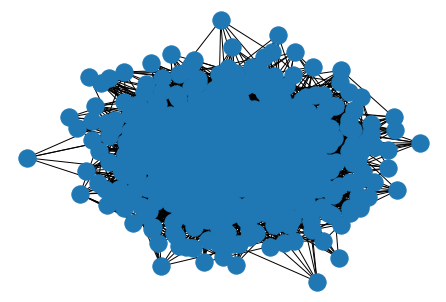

In [ ]:
nx.draw(G)
plt.savefig("network.png") # save as png
plt.show() # display

In [ ]:
A = nx.adjacency_matrix(G)

In [ ]:
print(A.todense())

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# w1=data['initial_opinion']
bs=my_data['bias']
v=my_data['convincing_power_changed']


In [ ]:
print(my_data['initial_opinion'])

0      0.192474
1      0.043894
2     -0.013099
3      0.321966
4     -0.022954
         ...   
479    0.166589
480    0.089153
481    0.106037
482    0.267613
483    0.438003
Name: initial_opinion, Length: 484, dtype: float64


In [ ]:
w1=[]
for i in range(len(my_data)):
  w1.append(my_data['initial_opinion'][i])

In [ ]:
print(w1)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(10, 30)) 
norm = MinMaxScaler(feature_range=(-1, 1))

#START FROM HERE CNT<1  
(PERCENTAGE OF USERS CHANGING OPINION LESS THAN 1%)
#COMPARING DIFFERENT MODELS

#DEGROOT MODEL : RUN SERIALLY 

In [ ]:

opinion=w1[:]
bias=bs[:]
convin=v[:]
FUinitial=opinion[0];

In [ ]:
print(opinion)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

In [ ]:
print(FUinitial)

0.192473822


# updated opinion in w2 
#DegrootInitial[] contains values after first update


In [ ]:

x=1
FUD=[]
FUD.append(FUinitial)
DegrootInitial=[]
while(1):
   
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          
          cp=convin[ind]
          followerOpinion= followerOpinion + (cp * opinion[ind])
          sumCp = sumCp + cp

#         print(s)

        sumCp= sumCp + convin[i]
        followerOpinion=followerOpinion +(convin[i]* opinion[i])
        if(sumCp>0):
          followerOpinion= followerOpinion/sumCp
        else:
          followerOpinion=opinion[i]
        w2.append(followerOpinion)
        if(i==0):
          FUD.append(followerOpinion)  
          

    lenw2=len(w2)
    
   

    #----------------------------------------------------------------------------------
    if(x==1):
      print("Initial Noted")
      for i in range(len(w2)):
        DegrootInitial.append(w2[i])
    print("iteration ",x)
    x=x+1
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
   
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):
      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1
    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
    if(cnt<1):
      break
    
    # if(x==4):
    #   break
    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

Initial Noted
iteration  1
scale of w2:  [ -0.2909477386361508 , 0.4589544863587419 ]


percentage difference: 97.72727272727273 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.061013453816536875 , 0.4179625477466196 ]


percentage difference: 90.49586776859503 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ 0.03008437101990422 , 0.40750786346574897 ]


percentage difference: 76.44628099173553 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ 0.060317463484548535 , 0.39735066355734755 ]


percentage difference: 59.29752066115702 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ 0.0907864353860468 , 0.38721728259309185 ]


percentage difference: 37.60330578512397 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ 0.11578101094373912 , 0.3773760297215465 ]


percent

In [ ]:
#storing final updated values in DeGroot=[ ]
DeGroot=[]
for i in range(len(w2)):
  DeGroot.append(w2[i])
print(len(DeGroot))
print(DeGroot[0])

484
0.18426339874400238


**Graph to compare initial opinion of user 0,with opinion of user 0 after evry iteration**

In [ ]:
IP=[]
for i in range (0,len(FUD)):
  IP.append(FUinitial)

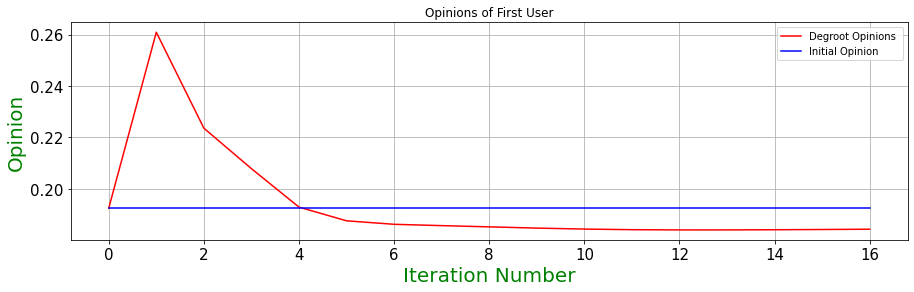

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(FUD, 'r')
l2, = plt.plot(IP, 'b')
plt.legend(['Degroot Opinions ', 'Initial Opinion'], loc='upper right')
plt.grid(True)
plt.title('Opinions of First User')
plt.show()

#FLOCKING MODEL : RUN SERIALLY 

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

In [ ]:
print(opinion[0],FUinitial)

0.192473822 0.192473822


# updated opinion in w2 
#flockInitial[] contains values after first update


In [ ]:

FUF=[]
FUF.append(FUinitial)
x=1
flockInitial=[]
while(1):
    means = {1:[-0.5,-0.5],2:[0.0,0.0],3:[0.5,0.5]}   #Initial Centeroids
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          
          if(abs(opinion[ind]-opinion[i] )< 0.01):
                cp=convin[ind]
                followerOpinion= followerOpinion + (cp * opinion[ind])
                sumCp = sumCp + 1

#         print(s) 
        if(sumCp>0):
          followerOpinion= followerOpinion/sumCp
        else:
          followerOpinion=opinion[i]
        w2.append(followerOpinion)  
        if(i==0):
          FUF.append(followerOpinion)

    lenw2=len(w2)
   

    #----------------------------------------------------------------------------------
    if(x==1):
      print("Initial Noted")
      for i in range(len(w2)):
        flockInitial.append(w2[i])

    print("iteration ",x)
    x=x+1
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
   
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):
      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1
    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
    if(cnt<1):
      break
    
    # if(x==4):
    #   break
    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

Initial Noted
iteration  1
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 29.75206611570248 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 16.32231404958678 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 13.223140495867769 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 6.6115702479338845 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 1.2396694214876034 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ -0.8365 , 0.905355369 ]


percentage difference: 0.0 %
----------------------------------------------------------


In [ ]:
#storing final updated values for Flocking with len
flockingLen=[]
for i in range(len(w2)):
  flockingLen.append(w2[i])
print(len(flockingLen))
print(flockingLen[0])

484
0.02436990841734745


**Graph to compare initial opinion of user 0,with opinion of user 0 after evry iteration**

In [ ]:
IP=[]
for i in range (0,len(FUF)):
  IP.append(FUinitial)

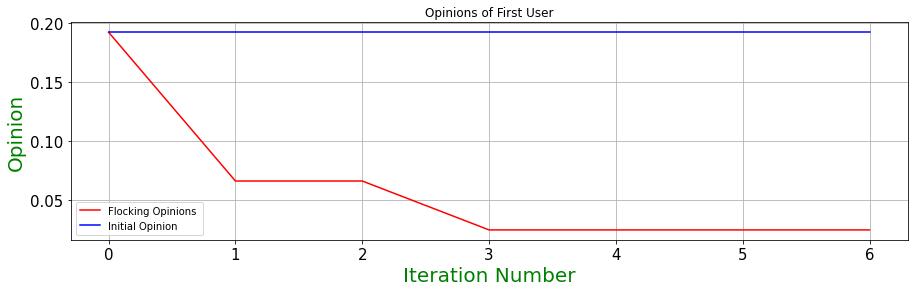

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(FUF, 'r')
l2, = plt.plot(IP, 'b')
plt.legend(['Flocking Opinions ', 'Initial Opinion'], loc='lower left')
plt.grid(True)
plt.title('Opinions of First User')
plt.show()

#DIFFERENCE MODEL : RUN SERIALLY 

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

# updated opinion in w2 
#ourInitial[] contains values after first update


In [ ]:
# updated opinion in w2 
# Formula with Opinion Difference opinion(-1,1) convin(0,1) bias(0,1)
x=1
FUDiff=[]
FUDiff.append(FUinitial)
ourInitial=[]
while(1):
    means = {1:[-0.5,-0.5],2:[0.0,0.0],3:[0.5,0.5]}   #Initial Centeroids
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          cp=convin[ind]
          sumCp=sumCp+1
          followerOpinion=followerOpinion+(opinion[ind]- I )*cp

#         print(s) 
        followerOpinion=followerOpinion/sumCp
        b=bias[i]
        followerOpinion = followerOpinion * b 
        w2.append(followerOpinion)  
        if(i==0):
          FUDiff.append(followerOpinion)
          

    lenw2=len(w2)
    for i in range (len(w2)):
      w2[i]=(w2[i]+opinion[i]) 

    #----------------------------------------------------------------------------------
    if(x==1):
      print("Initial Noted")
      for i in range(len(w2)):
        ourInitial.append(w2[i])
    print("iteration ",x)
    x=x+1
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):
      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1
    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
    if(cnt<1):
      break
    
    # if(x==4):
    #   break
    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

Initial Noted
iteration  1
scale of w2:  [ -0.7887266554219914 , 0.771704137787773 ]


percentage difference: 62.1900826446281 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.7432438913386514 , 0.6626263976533107 ]


percentage difference: 60.537190082644635 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.6999250205035682 , 0.576654280061109 ]


percentage difference: 54.958677685950406 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.6586524110815831 , 0.5645298150498017 ]


percentage difference: 51.2396694214876 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.6193167138926398 , 0.5586720032362881 ]


percentage difference: 52.892561983471076 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ -0.5818161123234713 , 0.558045198104204 ]


percentage dif

In [ ]:
#storing final updated values for Our formula WITH DIFFERENCE
diffModel=[]
for i in range(len(w2)):
  diffModel.append(w2[i])
print(len(diffModel))
print(diffModel[0])

484
0.19952743933629918


**Graph to compare initial opinion of user 0,with opinion of user 0 after evry iteration**

In [ ]:
IP=[]
for i in range (0,len(FUDiff)):
  IP.append(FUinitial)

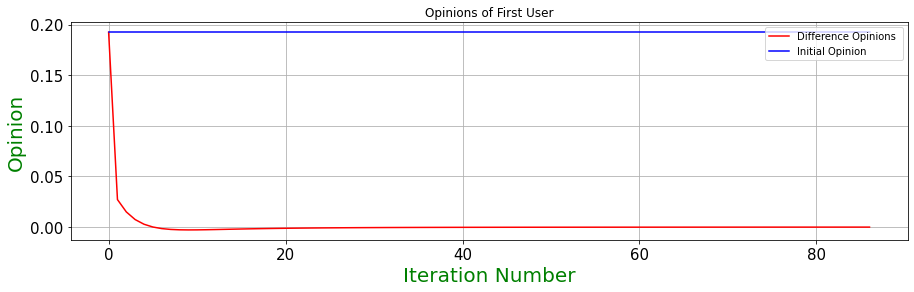

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(FUDiff, 'r')
l2, = plt.plot(IP, 'b')
plt.legend(['Difference Opinions ', 'Initial Opinion'], loc='upper right')
plt.grid(True)
plt.title('Opinions of First User')
plt.show()

#RESULTS OF FIRST USER OPINION

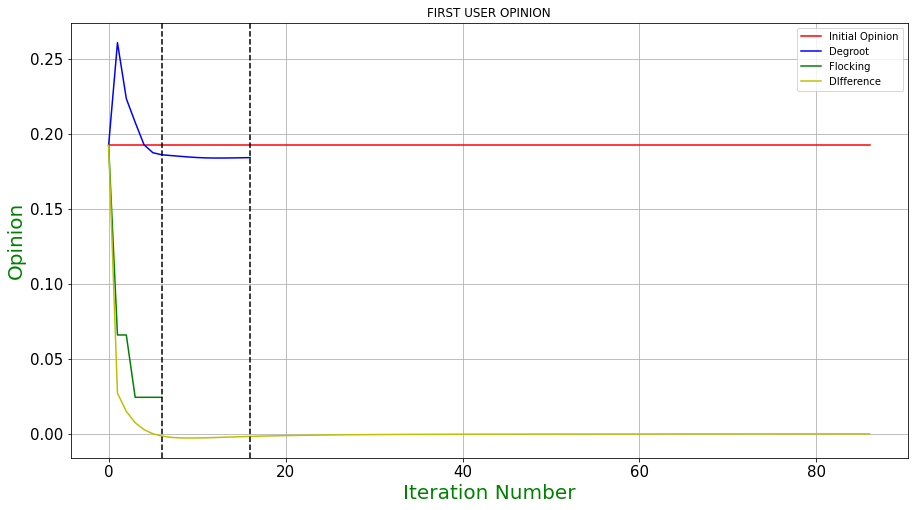

In [ ]:
plt.figure(figsize=(15,8))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(IP, 'r')
l2, = plt.plot(FUD, 'b')
l3, = plt.plot(FUF, 'g')
l3, = plt.plot(FUDiff, 'y')
# l5, = plt.plot(ourwithLen,'m')
xposition = [6,16]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.legend(['Initial Opinion', 'Degroot','Flocking','DIfference'], loc='upper right')
plt.grid(True)
plt.title('FIRST USER OPINION')
plt.show()

In [ ]:
length=len(FUDiff)
lenD=len(FUD)
val=FUD[lenD-1];
for i in range(lenD,length):
  FUD.append(val)

lenF=len(FUF)
val=FUF[lenF-1]
for i in range(lenF,length):
  FUF.append(val)

In [ ]:
print(len(FUD),len(FUF))

87 87


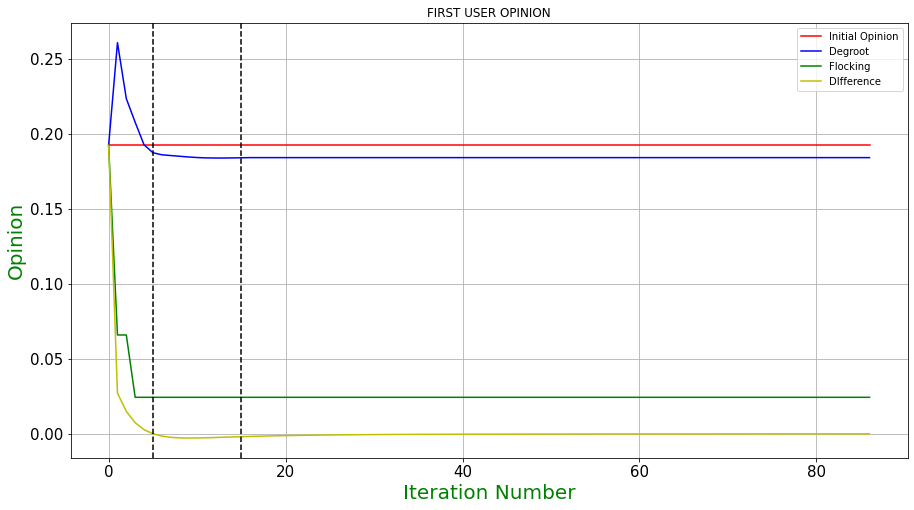

In [ ]:
plt.figure(figsize=(15,8))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(IP, 'r')
l2, = plt.plot(FUD, 'b')
l3, = plt.plot(FUF, 'g')
l3, = plt.plot(FUDiff, 'y')
# l5, = plt.plot(ourwithLen,'m')
xposition = [5,15]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.legend(['Initial Opinion', 'Degroot','Flocking','DIfference'], loc='upper right')
plt.grid(True)
plt.title('FIRST USER OPINION')
plt.show()

#RESULTS OF DIFFERENCE MODEL

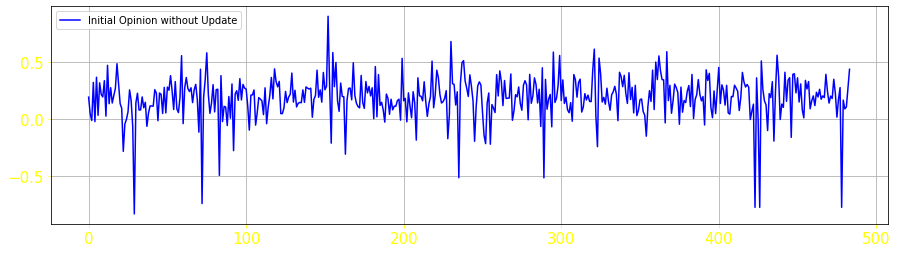

In [ ]:
plt.figure(figsize=(15,4))
l1, = plt.plot(w1, 'b')
plt.legend(['Initial Opinion without Update'], loc='upper left')
plt.grid(True)
plt.savefig('OpinionZero')
plt.show()

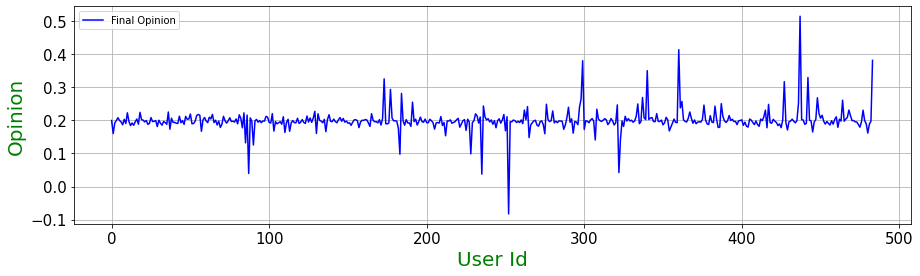

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(diffModel, 'b')
plt.legend(['Final Opinion'], loc='upper left')
plt.grid(True)
plt.savefig('DMlast')
plt.show()

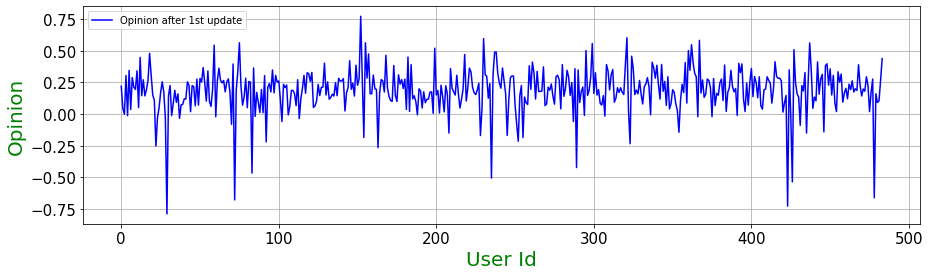

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(ourInitial, 'b')
plt.legend(['Opinion after 1st update'], loc='upper left')
plt.grid(True)
plt.savefig('DMfirst')
plt.show()

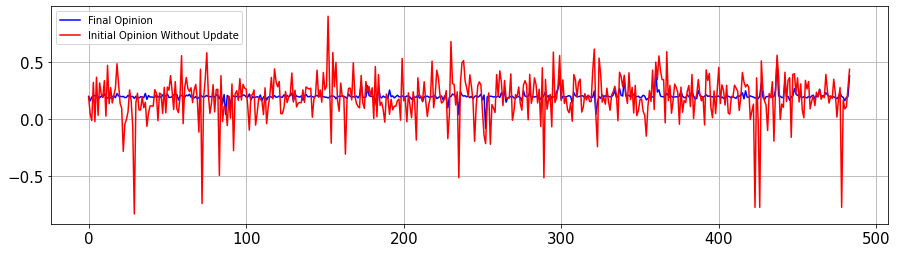

In [ ]:
plt.figure(figsize=(15,4))
l1, = plt.plot(diffModel, 'b')
l2, = plt.plot(w1, 'r')
# l3, = plt.plot(Flocking, 'g')
# l3, = plt.plot(FlockingwithLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['Final Opinion', 'Initial Opinion Without Update'], loc='upper left')
plt.grid(True)
plt.savefig('DMZeroLast')
plt.show()

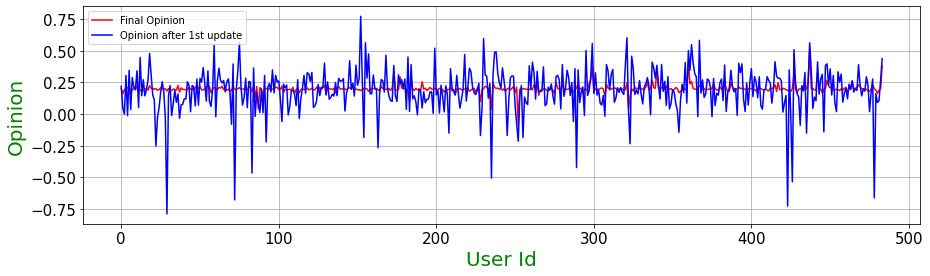

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(diffModel, 'r')
l2, = plt.plot(ourInitial, 'b')
# l3, = plt.plot(Flocking, 'g')
# l3, = plt.plot(FlockingwithLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['Final Opinion', 'Opinion after 1st update'], loc='upper left')
plt.grid(True)
plt.savefig('DMFirstLast')
plt.show()

In [ ]:
OurModel= pd.DataFrame(list(zip( ourInitial,diffModel)),columns =['Initial', 'Final'])

In [ ]:
OurModel.to_csv('OurModel.csv')

#RESULTS OF DEGROOT MODEL

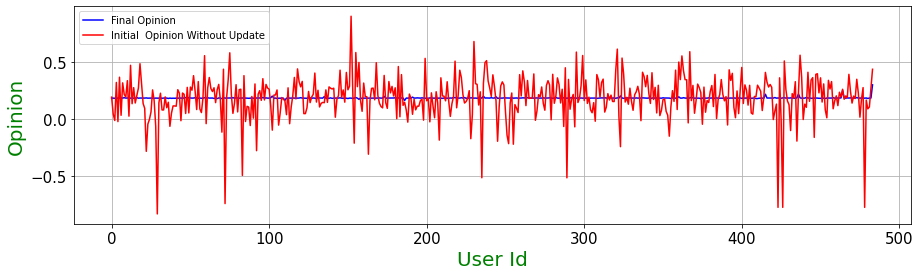

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(DeGroot, 'b')
l2, = plt.plot(w1, 'r')

plt.legend(['Final Opinion', 'Initial  Opinion Without Update'], loc='upper left')
plt.grid(True)
plt.savefig('GRZeroLast')
plt.show()

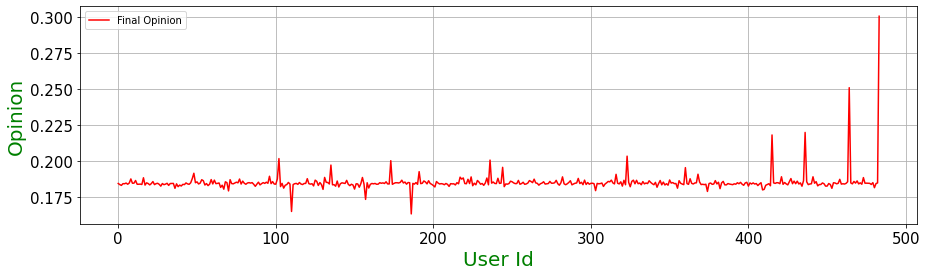

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(DeGroot, 'r')

plt.legend(['Final Opinion'], loc='upper left')
plt.grid(True)
plt.savefig('GRLast')
plt.show()

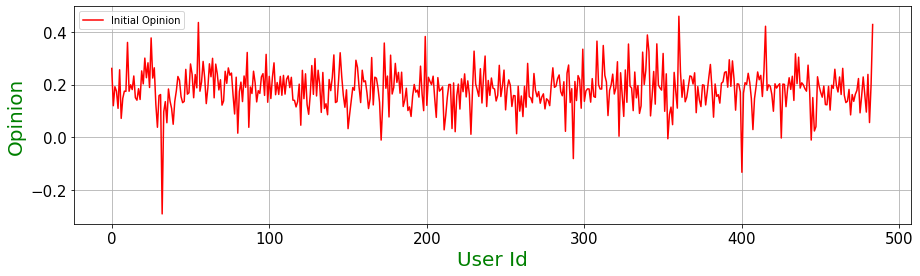

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(DegrootInitial, 'r')

plt.legend(['Initial Opinion'], loc='upper left')
plt.grid(True)
plt.savefig('GRFirst')
plt.show()

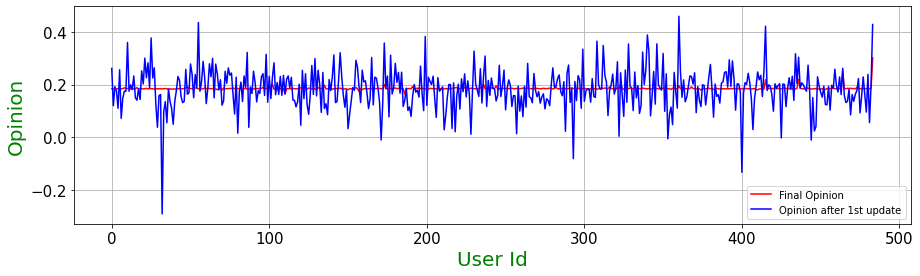

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(DeGroot, 'r')
l2, = plt.plot(DegrootInitial, 'b')
# l3, = plt.plot(Flocking, 'g')
# l3, = plt.plot(FlockingwithLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['Final Opinion', 'Opinion after 1st update'], loc='lower right')
plt.grid(True)
plt.savefig('GRFirstLast')
plt.show()

In [ ]:
DegrootModel= pd.DataFrame(list(zip( DegrootInitial,DeGroot)),columns =['Initial', 'Final'])

In [ ]:
DegrootModel.to_csv('DegrootModel.csv')

#RESULTS OF FLOCKING MODEL

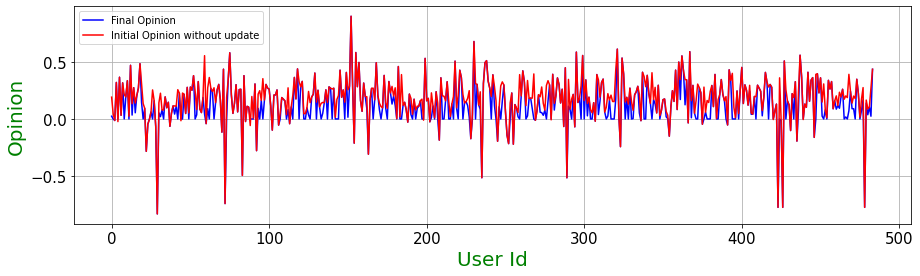

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(flockingLen, 'b')
l2, = plt.plot(w1, 'r')

plt.legend(['Final Opinion', 'Initial Opinion without update'], loc='upper left')
plt.grid(True)
plt.savefig('FMZeroLast')
plt.show()

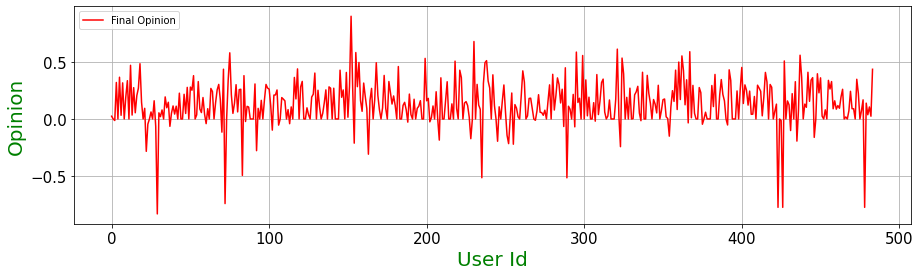

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(flockingLen, 'r')
plt.legend(['Final Opinion'], loc='upper left')
plt.grid(True)
plt.savefig('FMLast')
plt.show()

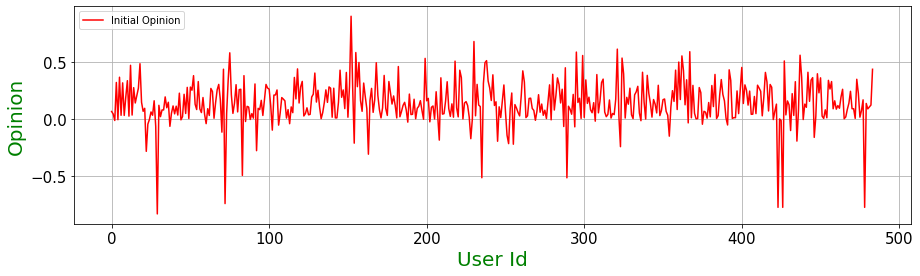

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(flockInitial, 'r')
plt.legend(['Initial Opinion'], loc='upper left')
plt.grid(True)
plt.savefig('FMFirst')
plt.show()

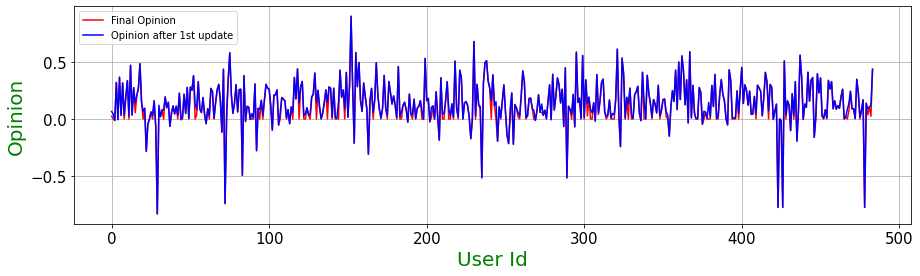

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion',fontsize=20,color='green')
l1, = plt.plot(flockingLen, 'r')
l2, = plt.plot(flockInitial, 'b')
# l3, = plt.plot(Flocking, 'g')
# l3, = plt.plot(FlockingwithLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['Final Opinion', 'Opinion after 1st update'], loc='upper left')
plt.grid(True)
plt.savefig('FMFirstLast')
plt.show()

In [ ]:
FlockingModel= pd.DataFrame(list(zip( flockInitial,flockingLen)),columns =['Initial', 'Final'])

In [ ]:
FlockingModel.to_csv('FlockingModel.csv') 

#ALL THREE MODELS AFTER FIRST UPDATE

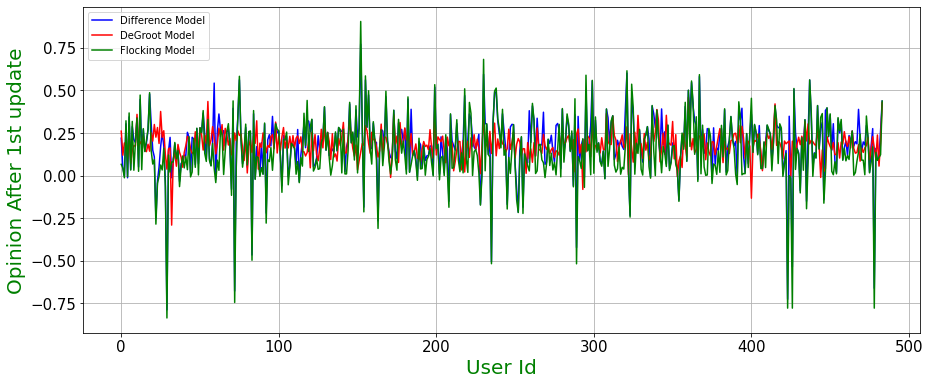

In [ ]:
plt.figure(figsize=(15,6))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Opinion After 1st update',fontsize=20,color='green')
l1, = plt.plot(ourInitial, 'b')
l2, = plt.plot(DegrootInitial, 'r')
l3, = plt.plot(flockInitial, 'g')
plt.legend(['Difference Model', 'DeGroot Model','Flocking Model'], loc='upper left')
plt.grid(True)
plt.savefig('ALLFirst')
plt.show()

#ALL THREE MODELS AFTER LAST UPDATE

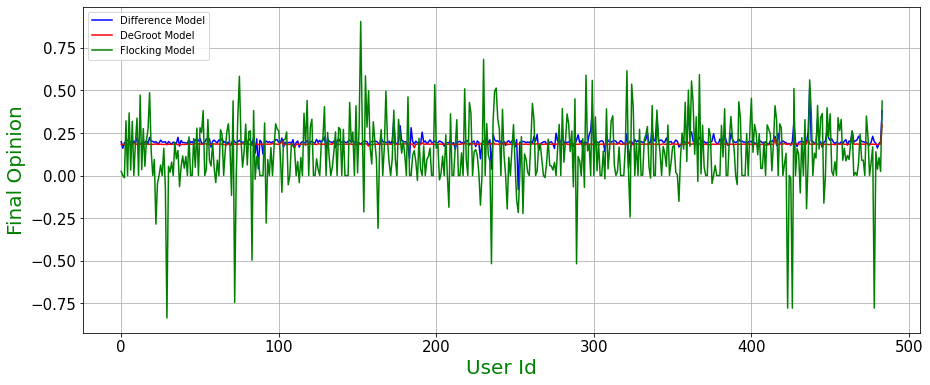

In [ ]:
plt.figure(figsize=(15,6))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('User Id',fontsize=20,color='green')
plt.ylabel('Final Opinion',fontsize=20,color='green')
l1, = plt.plot(diffModel, 'b')
l2, = plt.plot(DeGroot, 'r')
# l3, = plt.plot(Flocking, 'g')
l3, = plt.plot(flockingLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['Difference Model', 'DeGroot Model','Flocking Model'], loc='upper left')
plt.grid(True)
plt.savefig('ALLLast')
plt.show()

#MEAN SQUARED ERROR CALCULATION

In [ ]:
str="{:.2f}"
f=13.4567
r=str.format(f)
print(r)

13.46


In [ ]:
#Degroot and Ourmodel
d=[]
o=[]
for i in range(len(diffModel)):
  o.append(float(str.format(diffModel[i])))
for i in range(len(DeGroot)):
  d.append(float(str.format(DeGroot[i])))


In [ ]:
f=[]
for i in range(len(flockingLen)):
  f.append(float(str.format(flockingLen[i])))

In [ ]:
type(d[0])

float

In [ ]:
darr= np.array(d)
oarr=np.array(o) 
print(darr.shape,oarr.shape)

(484,) (484,)


In [ ]:
farr=np.array(f)

In [ ]:
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(darr,oarr) 

0.0014285123966942153

In [ ]:
mean_squared_error(farr,oarr)

0.05363884297520662

In [ ]:
type(darr[0])

numpy.float64